In [18]:
import os
import shutil
import random

In [19]:
dataset_path = "./PlantBalanced"

In [20]:
for category_folder in os.listdir(dataset_path):
    print(category_folder)

Bacterial_Spot
Curl_Virus
Early_Blight
Healthy
Late_Blight
Leaf_Mold
Mosaic_Virus
Septoria_Leaf_Spot
Spider_Mites
Target_Spot


In [21]:
desired_num_images = 1000

In [22]:
for category_folder in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category_folder)

    # Check if it's a directory
    if os.path.isdir(category_path):
        # Get a list of all images in the category folder
        all_images = os.listdir(category_path)

        # If there are more than desired_num_images, randomly select only desired_num_images
        if len(all_images) > desired_num_images:
            selected_images = random.sample(all_images, desired_num_images)
            for image in all_images:
                if image not in selected_images:
                    image_path = os.path.join(category_path, image)
                    os.remove(image_path)
                    


In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import splitfolders


In [24]:
splitfolders.ratio("./PlantBalanced", output="output",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 10000 files [00:07, 1385.23 files/s]


In [25]:
IMAGE_SIZE = 256
CHANNELS = 3

In [26]:
output_directory = "./AugmentedImages"

In [27]:
data_dir = './output/train'  # Replace with your actual directory path

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    
    if os.path.isdir(class_path):
        image_names = os.listdir(class_path)
        print(f"Class '{class_name}': {len(image_names)} images")
        print("\n")

Class 'Bacterial_Spot': 800 images


Class 'Curl_Virus': 801 images


Class 'Early_Blight': 800 images


Class 'Healthy': 800 images


Class 'Late_Blight': 800 images


Class 'Leaf_Mold': 800 images


Class 'Mosaic_Virus': 800 images


Class 'Septoria_Leaf_Spot': 800 images


Class 'Spider_Mites': 800 images


Class 'Target_Spot': 800 images




In [28]:
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        './output/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
            save_to_dir="./AugmentedImages"
)


Found 8000 images belonging to 10 classes.


In [31]:
train_generator.class_indices

{'Bacterial_Spot': 0,
 'Curl_Virus': 1,
 'Early_Blight': 2,
 'Healthy': 3,
 'Late_Blight': 4,
 'Leaf_Mold': 5,
 'Mosaic_Virus': 6,
 'Septoria_Leaf_Spot': 7,
 'Spider_Mites': 8,
 'Target_Spot': 9}

In [32]:
class_names = list(train_generator.class_indices.keys())
class_names

['Bacterial_Spot',
 'Curl_Virus',
 'Early_Blight',
 'Healthy',
 'Late_Blight',
 'Leaf_Mold',
 'Mosaic_Virus',
 'Septoria_Leaf_Spot',
 'Spider_Mites',
 'Target_Spot']

In [33]:
count=0
for image_batch, label_batch in train_generator:
    print(label_batch)
    print(image_batch[0])
    break

[5. 8. 5. 9. 5. 8. 5. 3. 2. 4. 2. 2. 6. 2. 7. 5. 4. 1. 0. 5. 3. 6. 1. 2.
 9. 3. 8. 4. 8. 4. 6. 9.]
[[[0.5176471  0.5411765  0.6039216 ]
  [0.5370004  0.5605298  0.623275  ]
  [0.54509807 0.5686275  0.6313726 ]
  ...
  [0.55514956 0.57867897 0.64142406]
  [0.5537798  0.5773092  0.6400543 ]
  [0.55241    0.5759394  0.6386845 ]]

 [[0.5176471  0.5411765  0.6039216 ]
  [0.53380436 0.55733377 0.62007886]
  [0.54509807 0.5686275  0.6313726 ]
  ...
  [0.556426   0.57995546 0.64270055]
  [0.55825233 0.58178174 0.64452684]
  [0.56007874 0.58360815 0.64635324]]

 [[0.5176471  0.5411765  0.6039216 ]
  [0.53060824 0.5541377  0.6168828 ]
  [0.54509807 0.5686275  0.6313726 ]
  ...
  [0.5647059  0.5882353  0.6509804 ]
  [0.5647059  0.5882353  0.6509804 ]
  [0.5647059  0.5882353  0.6509804 ]]

 ...

 [[0.4039216  0.38823533 0.4431373 ]
  [0.4039216  0.38823533 0.4431373 ]
  [0.4039216  0.38823533 0.4431373 ]
  ...
  [0.4096681  0.40182495 0.45280534]
  [0.4037032  0.39586008 0.44684047]
  [0.3897835  

In [34]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        './output/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1000 images belonging to 10 classes.


In [35]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'output/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1000 images belonging to 10 classes.


In [36]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.7183057  0.67516845 0.69869787]
  [0.67893344 0.6357962  0.6593256 ]
  [0.6972324  0.6540951  0.6776245 ]
  ...
  [0.6874338  0.6442965  0.66782594]
  [0.6806874  0.6375502  0.6610796 ]
  [0.6739411  0.6308038  0.65433323]]

 [[0.7143703  0.67123306 0.69476247]
  [0.6913018  0.6481646  0.671694  ]
  [0.68373966 0.6406024  0.6641318 ]
  ...
  [0.6595823  0.61644506 0.6399745 ]
  [0.6618311  0.6186938  0.64222324]
  [0.6640799  0.62094265 0.64447206]]

 [[0.7104349  0.66729766 0.6908271 ]
  [0.7036701  0.66053283 0.68406224]
  [0.67024696 0.6271097  0.6506391 ]
  ...
  [0.6694587  0.62632143 0.64985085]
  [0.6688965  0.62575924 0.64928865]
  [0.66833436 0.6251971  0.6487265 ]]

 ...

 [[0.47802797 0.41920444 0.4388123 ]
  [0.47128162 0.4124581  0.43206593]
  [0.46453524 0.4057117  0.42531955]
  ...
  [0.47171783 0.4128943  0.43250215]
  [0.44307333 0.3842498  0.40385765]
  [0.48288128 0.42405775 0.4436656 ]]

 [[0.509556   0.45073247 0.4703403 ]
  [0.52979505 0.47097155 0.4905794 ]


In [37]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [39]:
model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [40]:
8000/32

250.0

In [ ]:
1000/32

In [43]:
history = model.fit(
    train_generator,
    steps_per_epoch=250,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=31,
    verbose=1,
    epochs=10,
)

Epoch 1/10
250/250 [==============================] - 427s 2s/step - loss: 1.7661 - accuracy: 0.3531 - val_loss: 1.2416 - val_accuracy: 0.5565
Epoch 2/10
250/250 [==============================] - 458s 2s/step - loss: 1.0629 - accuracy: 0.6198 - val_loss: 0.7897 - val_accuracy: 0.7147
Epoch 3/10
250/250 [==============================] - 502s 2s/step - loss: 0.7465 - accuracy: 0.7408 - val_loss: 0.6158 - val_accuracy: 0.7631
Epoch 4/10
250/250 [==============================] - 484s 2s/step - loss: 0.5855 - accuracy: 0.7959 - val_loss: 0.5059 - val_accuracy: 0.8216
Epoch 5/10
250/250 [==============================] - 521s 2s/step - loss: 0.4915 - accuracy: 0.8273 - val_loss: 0.5620 - val_accuracy: 0.8105
Epoch 6/10
250/250 [==============================] - 358s 1s/step - loss: 0.4231 - accuracy: 0.8476 - val_loss: 0.5393 - val_accuracy: 0.8125
Epoch 7/10
250/250 [==============================] - 377s 2s/step - loss: 0.3670 - accuracy: 0.8714 - val_loss: 0.3980 - val_accuracy: 0.8629

In [44]:
history.params 

{'verbose': 1, 'epochs': 10, 'steps': 250}

In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

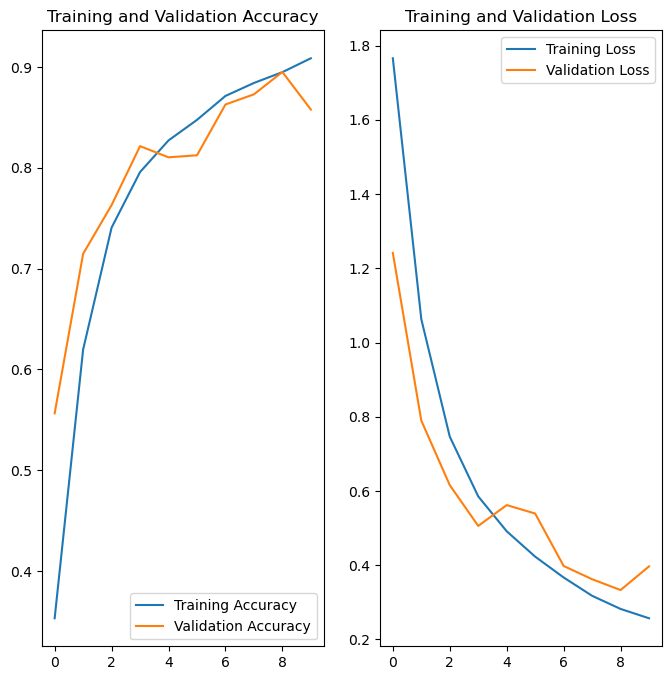

In [48]:
EPOCHS = 10

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Mosaic_Virus
1/1 [==============================] - 0s 340ms/step
predicted label: Mosaic_Virus


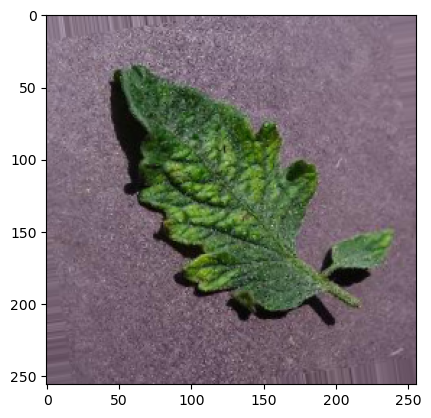

In [49]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 24ms/step


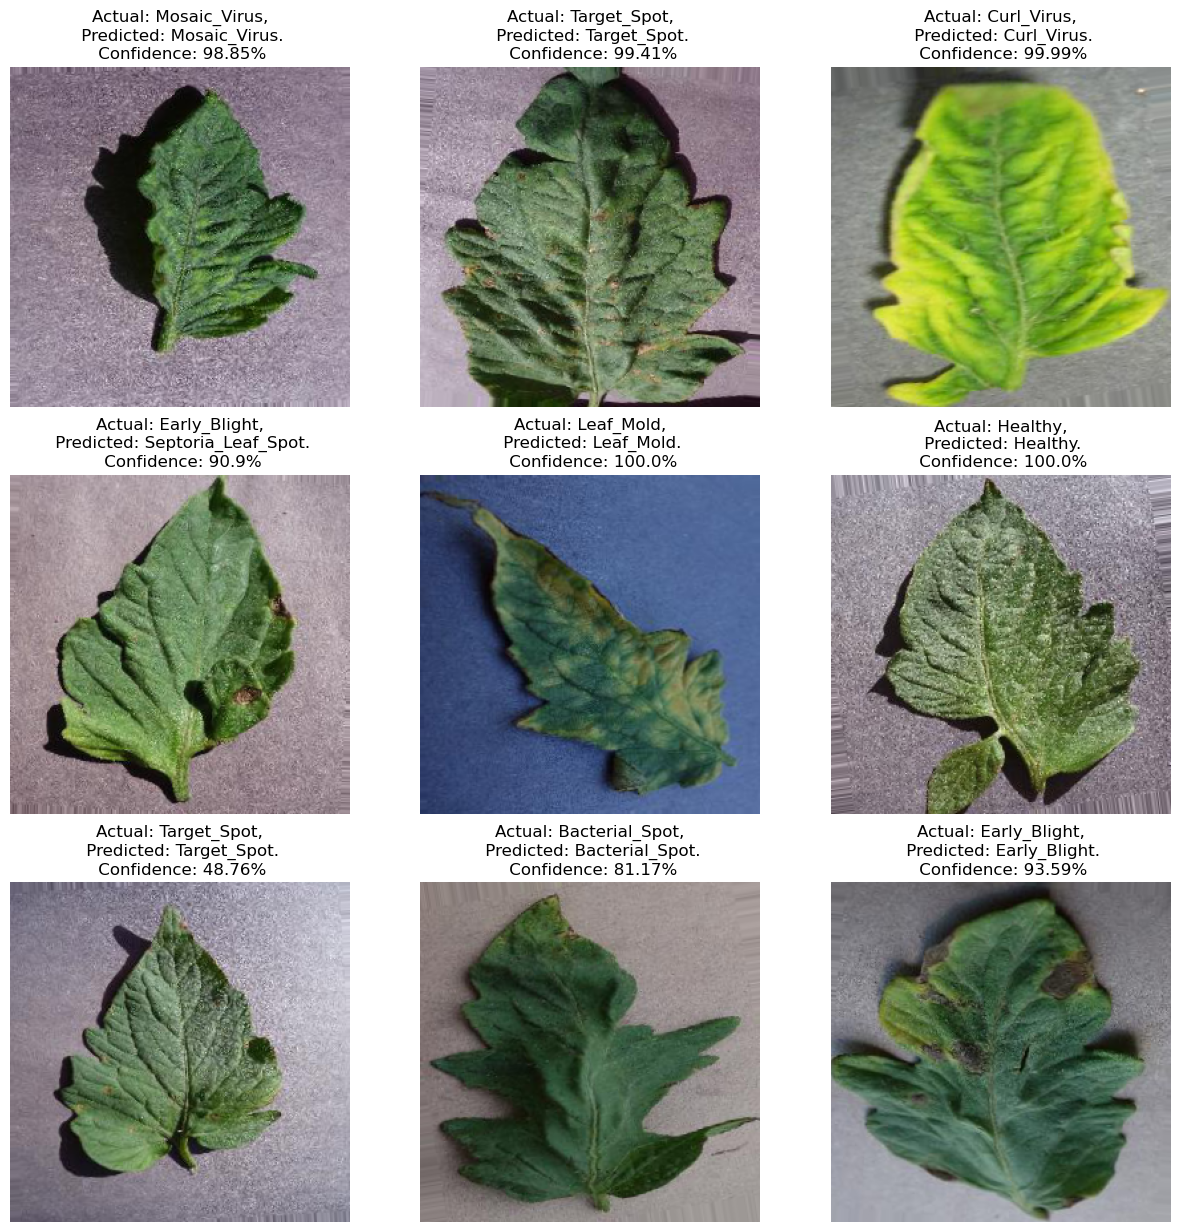

In [52]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [56]:
model.save("./tomato.h5")

In [58]:
model.save("./tomato.keras")